# Plot SNR distribution and other quality metrics 

The quality metrics are provided in asari feature table.

This notebook was used to generated Supl Fig S9.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_table('../baddata/bad10293_full_Feature_table.tsv', header=0, index_col=0, sep='\t')

In [4]:
data

,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,neg-12C14N-3-0ev,neg-12C14N-1-0ev,neg-12C14N-2-0ev
id_number,,,,,,,,,,,,,
F1,70.0641,145.30,141.91,147.54,0,970744,1.00,1.00,177,3,340642,262761,391768
F2,70.4391,145.86,143.05,148.66,1,5255888,1.00,0.99,1093,3,1736004,1722369,1820536
F3,71.0114,191.32,184.40,198.27,4,4961101,0.51,0.90,67,3,1627905,1744798,1653648
F4,71.0121,145.86,143.62,152.59,5,412161,1.00,0.78,58,3,206921,85905,140752
F5,71.0127,146.42,142.48,152.59,6,1190266,1.00,0.90,153,3,499869,342463,374384
...,...,...,...,...,...,...,...,...,...,...,...,...,...
F10289,316.0794,427.47,421.16,434.38,5797,978556,0.75,0.95,8,3,288926,395256,321090
F10290,319.0903,434.96,428.62,441.96,5798,2132030,1.00,0.96,102,3,737625,699553,726901
F10291,319.0903,448.39,442.55,455.38,5798,928723,0.76,0.76,34,3,300427,340406,304797


In [5]:
data['log2snr'] = np.log2(data['snr'])
data['log2area'] = np.log2(data['peak_area'])
# csel = data['cSelectivity']
# shape = data['goodness_fitting']

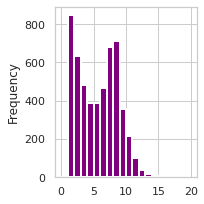

In [14]:
# good dataset
D29 = pd.read_table('../asari1.10.6_default_full_Feature_table.tsv', header=0, index_col=0, sep='\t')

D29['log2snr'] = np.log2(D29['snr'])
D29['log2area'] = np.log2(D29['peak_area'])

plt.figure(figsize=(3, 3))
# ylim=(0,3000), 
D29['log2snr'].plot.hist(bins=20, range=(0, 20), color='purple', linewidth=2, log=False, xticks=[0, 5, 10, 15, 20])
plt.tight_layout()
plt.savefig('gooddata_distr_log2snr.pdf')

In [7]:
import seaborn as sns
sns.set_theme(style="whitegrid")


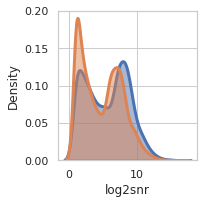

In [8]:
# KED plot
fig, ax = plt.subplots(figsize=(3,3))
sns.kdeplot( data=D29['log2snr'],  ax=ax, fill=True, alpha=.5, linewidth=3)
sns.kdeplot( data=data['log2snr'], ax=ax, fill=True, alpha=.5, linewidth=3)
plt.tight_layout()
plt.savefig('KDE_distr_log2snr_goodbad_yeast.pdf')

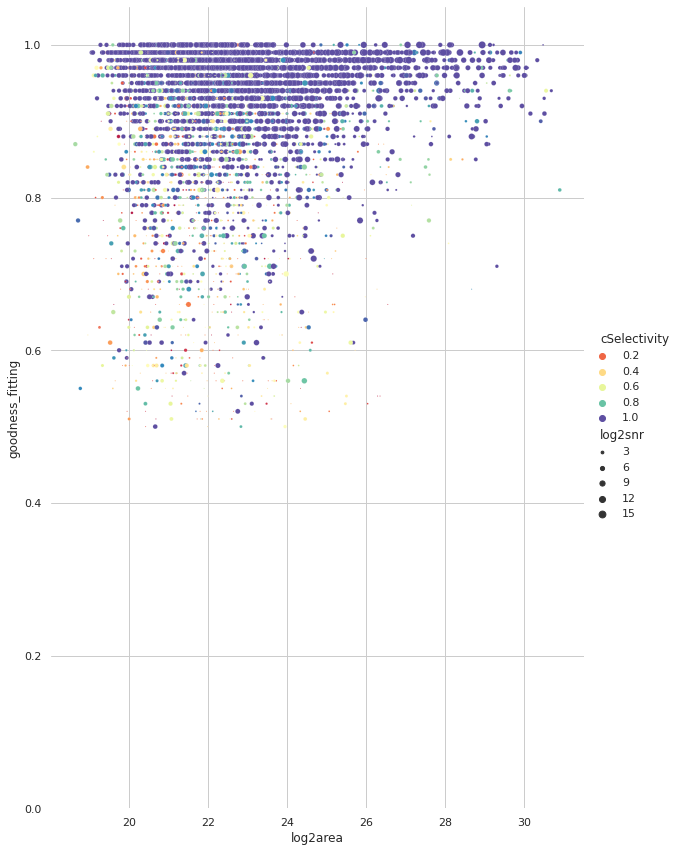

In [20]:
cmap = sns.color_palette("Spectral", as_cmap=True)

# sns.cubehelix_palette(gamma=0.7, as_cmap=True)
# cmap = sns.light_palette("#5d06e9", as_cmap=True)

g = sns.relplot(
    data=D29, x="log2area",
    y="goodness_fitting", 
    hue="cSelectivity",  size="log2snr",
    palette=cmap, sizes=(1, 50),
    height=12, aspect=0.7,
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_ylim(0, 1.05)
g.despine(left=True, bottom=True)
g.savefig('goodhoriz_yeast_sns_metrics.pdf')

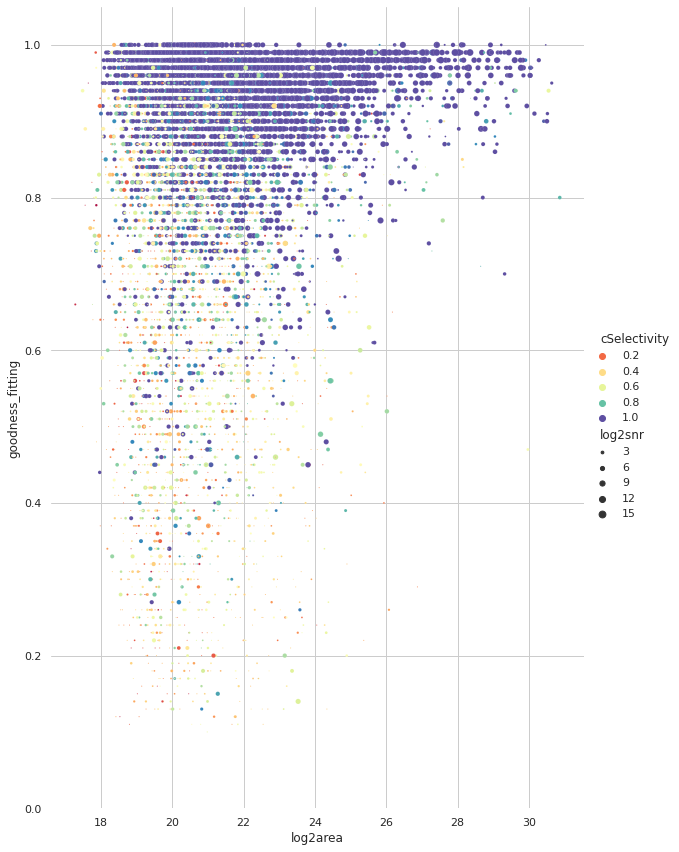

In [19]:
cmap = sns.color_palette("Spectral", as_cmap=True)

# sns.cubehelix_palette(gamma=0.7, as_cmap=True)
# cmap = sns.light_palette("#5d06e9", as_cmap=True)

g = sns.relplot(
    data=data, x="log2area",
    y="goodness_fitting", 
    hue="cSelectivity",  size="log2snr",
    palette=cmap, sizes=(1, 50),
    height=12, aspect=0.7,
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_ylim(0, 1.05)
g.despine(left=True, bottom=True)
g.savefig('badhoriz_yeast_sns_metrics.pdf')

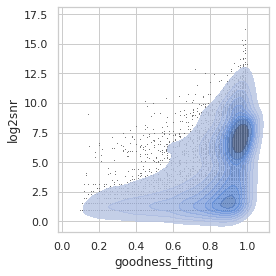

In [10]:
x, y = data['goodness_fitting'], data['log2snr']

fig, ax = plt.subplots(figsize=(4,4))
sns.scatterplot(x=x, y=y,  ax=ax, s=1, color=".15")
sns.kdeplot(x=x, y=y,  ax=ax, fill=True, alpha=.8,)

plt.tight_layout()
            
            #levels=5, color="w", linewidths=1)

plt.savefig("badkde_snr_shape" + ".png")
plt.savefig("badkde_snr_shape" + ".pdf")

## Summary

Generated figures for comparing "good" and "bad" data.